In [1]:
# Aditya Ranade
# COMM173
# Dr. David Jeong
# 14 June 2023

####### Final Project - Code Report ########

# let us start by uploading the necessary files
from google.colab import files
uploaded = files.upload()

Saving Airline-Sentiment-2-w-AA.csv to Airline-Sentiment-2-w-AA.csv


In [9]:
import pandas as pd

# Data
# my data has already been scraped since I got this data from a source on kaggle
# in the real world, this data would be scraped from twitter or any other social media platform

airlineTweetData = pd.read_csv('Airline-Sentiment-2-w-AA.csv')
print(airlineTweetData)
print(airlineTweetData.shape)

       index   _unit_id  _golden _unit_state  _trusted_judgments  \
0          0  681448150    False   finalized                   3   
1          1  681448153    False   finalized                   3   
2          2  681448156    False   finalized                   3   
3          3  681448158    False   finalized                   3   
4          4  681448159    False   finalized                   3   
...      ...        ...      ...         ...                 ...   
14635  14635  681679794    False   finalized                   3   
14636  14636  681679795    False   finalized                   3   
14637  14637  681679796    False   finalized                   3   
14638  14638  681679797    False   finalized                   3   
14639  14639  681679798    False   finalized                   3   

      _last_judgment_at airline_sentiment  airline_sentiment:confidence  \
0          2/25/15 5:24           neutral                        1.0000   
1          2/25/15 1:53          

In [6]:
# let's figure out how much null data we have and which columns we can get rid of

# data preparation
# we need to clean the data to get it to a workable size so we can start performing our analysis
# as of now, there are several columns we don't need in order to conduct our analysis

nullCounter = airlineTweetData.isna().sum()
print(nullCounter)

index                               0
_unit_id                            0
_golden                             0
_unit_state                         0
_trusted_judgments                  0
_last_judgment_at                  56
airline_sentiment                   0
airline_sentiment:confidence        0
negativereason                   5462
negativereason:confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_id                            0
tweet_location                   4733
user_timezone                    4820
dtype: int64


In [10]:
# Data Cleaning

# lets start by dropping index and _unit_id as they are unique to each tweet and we won't use them in our data analysis

airlineTweetData.drop('index', axis = 1, inplace = True)
airlineTweetData.drop('_unit_id', axis = 1, inplace = True)

# next lets drop airline_sentiment_gold, negativereason_gold, and tweet_coord since they have several NaN values which are not helpful to us

airlineTweetData.drop('airline_sentiment_gold', axis = 1, inplace = True)
airlineTweetData.drop('negativereason_gold', axis = 1, inplace = True)
airlineTweetData.drop('tweet_coord', axis = 1, inplace = True)

# we don't plan to use tweet location and user_timezone so let's drop that as well

airlineTweetData.drop('tweet_location', axis = 1, inplace = True)
airlineTweetData.drop('user_timezone', axis = 1, inplace = True)

# we also don't care about when tweet was created or the tweet id for our task at hand. the retweet_count also doesn't matter

airlineTweetData.drop('tweet_created', axis = 1, inplace = True)
airlineTweetData.drop('tweet_id', axis = 1, inplace = True)
airlineTweetData.drop('retweet_count', axis = 1, inplace = True)

# we also don't plan to use _golden, _unit_state, _trusted_judgments, _last_judgment_at, airline_sentiment:confidence, negativereason:confidence, or name so we can drop all these

airlineTweetData.drop('_golden', axis = 1, inplace = True)
airlineTweetData.drop('_unit_state', axis = 1, inplace = True)
airlineTweetData.drop('_trusted_judgments', axis = 1, inplace = True)
airlineTweetData.drop('_last_judgment_at', axis = 1, inplace = True)
airlineTweetData.drop('airline_sentiment:confidence', axis = 1, inplace = True)
airlineTweetData.drop('negativereason:confidence', axis = 1, inplace = True)
airlineTweetData.drop('name', axis = 1, inplace = True)

print(airlineTweetData)

      airline_sentiment          negativereason         airline  \
0               neutral                     NaN  Virgin America   
1              positive                     NaN  Virgin America   
2               neutral                     NaN  Virgin America   
3              negative              Bad Flight  Virgin America   
4              negative              Can't Tell  Virgin America   
...                 ...                     ...             ...   
14635          positive                     NaN        American   
14636          negative  Customer Service Issue        American   
14637           neutral                     NaN        American   
14638          negative  Customer Service Issue        American   
14639           neutral                     NaN        American   

                                                    text  
0                    @VirginAmerica What @dhepburn said.  
1      @VirginAmerica plus you've added commercials t...  
2      @VirginAmer

In [11]:
# find all the unique airlines

# Analysis

# now we are going to use the cleaned data to start drawing some insights and conclusions
uniqueAirlines = airlineTweetData['airline'].unique().tolist()
print(uniqueAirlines)

['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways', 'American']


In [12]:
# we see that we have 6 different airlines.
# now we want to check which airlines have positive vs. negative vs. neutral

# we can use the groupby function in python to group the dataset by airline and then by airline sentiment to see the total counts in each
# from this we can then generate charts, as well as can see which airline had the most tweets.
sentiment_counts = airlineTweetData.groupby(['airline', 'airline_sentiment']).size().reset_index(name='count')
print(sentiment_counts)

           airline airline_sentiment  count
0         American          negative   1960
1         American           neutral    463
2         American          positive    336
3            Delta          negative    955
4            Delta           neutral    723
5            Delta          positive    544
6        Southwest          negative   1186
7        Southwest           neutral    664
8        Southwest          positive    570
9       US Airways          negative   2263
10      US Airways           neutral    381
11      US Airways          positive    269
12          United          negative   2633
13          United           neutral    697
14          United          positive    492
15  Virgin America          negative    181
16  Virgin America           neutral    171
17  Virgin America          positive    152


In [13]:
# let's see the total values now:

# use groupby feature and .sum() functionality to print this
total_sentiments = sentiment_counts.groupby('airline')['count'].sum()
print(total_sentiments)

airline
American          2759
Delta             2222
Southwest         2420
US Airways        2913
United            3822
Virgin America     504
Name: count, dtype: int64


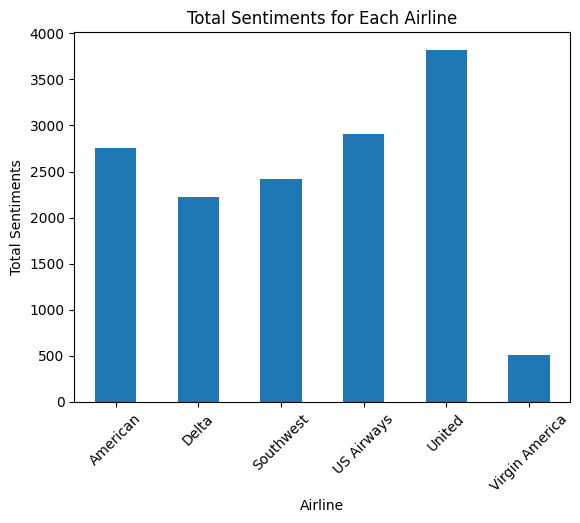

In [14]:
# let's plot the total sentiments in a bar graph to get a visual, and then we will plot for individual airlines

import matplotlib.pyplot as plt

total_sentiments.plot(kind = 'bar')
plt.xlabel('Airline')
plt.ylabel('Total Sentiments')
plt.title('Total Sentiments for Each Airline')
plt.xticks(rotation = 45)
plt.show()

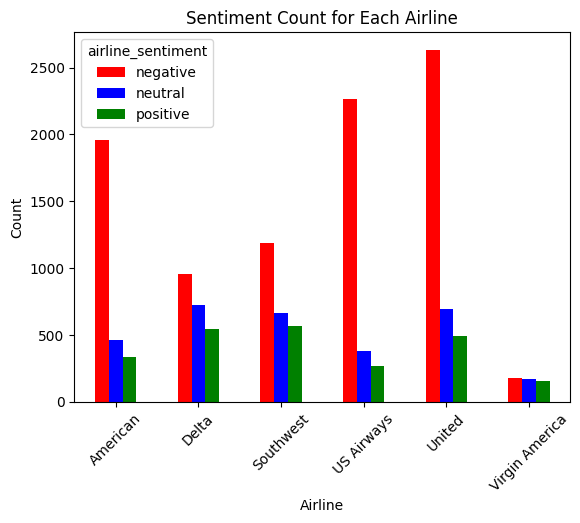

In [16]:
# now let's plot the individual values for each airline:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we can use the pivot functionality to get these values in a single bar graph:

pivot_sentiment_counts = sentiment_counts.pivot(index = 'airline', columns = 'airline_sentiment', values = 'count')
pivot_sentiment_counts.plot(kind = 'bar', stacked = False, color = ['red', 'blue', 'green'])
plt.xlabel('Airline')
plt.ylabel('Count')
plt.title('Sentiment Count for Each Airline')
plt.xticks(rotation = 45)
plt.show()

In [17]:
# the next step in the analysis would be to look at the stocks on Feb 25th of each of these airlines and see how the stock did.
# we would expect to see the stock go lower if there are more negative tweets. But if there are not as many negative tweets like for delta or southwest, we
# would expect to see the stock go down a little bit or even potentially go up.

# It would also be wise to look at the stock the next day after, to see if the stock price was affected, as in a real life situation, what would happen is that
# the tweets would be scraped after the day is over, and predictions would be made for the day/week after. There is no way it could tell what happened in the stock price
# during the day since hindsight is always 20/20.

# after this, we can move on to the second part of the project, which is using the nltk sentiment analyzer on vader.
# what we would do for analysis here is to first take the text portion of each tweet, remove the @ with the airline name,
# tokenize the tweet, remove stopwords, and perform sentiment analysis on that phrase of words, and use the SIA to classify the text of each
# tweet as neutral, positive, or negative. We would then use this information to compare to the labels that have been put by humans in this dataset
# and analyze which tweets were labeled differently by the machine and the human. This would assume that the human has labeled all data correctly, and would tell us
# how accurate the sentiment intensity analyzer is.

# this would require us to go through all the steps again so we will pause here since the steps have already been gone through for the first part of the project